In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look nicer
sns.set_style('whitegrid')


In [2]:
import jsonlines
import pandas as pd

data = []import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look nicer
sns.set_style('whitegrid')

with jsonlines.open('fashion.json') as reader:
    for obj in reader:
        data.append(obj)

df_fashion = pd.DataFrame(data)
df_fashion.head()

,product,scene,bbox
0,0027e30879ce3d87f82f699f148bff7e,cdab9160072dd1800038227960ff6467,"[0.434097, 0.859363, 0.560254, 1.0]"
1,0027e30879ce3d87f82f699f148bff7e,14f59334af4539132981b1324a731067,"[0.175269, 0.527773, 0.621485, 0.924899]"
2,0027e30879ce3d87f82f699f148bff7e,e7d32df9f45b691afc580808750f73ca,"[0.588666, 0.638503, 0.750647, 0.761368]"
3,0027e30879ce3d87f82f699f148bff7e,c0be585ed21b1a6c6dc9559ebe007ede,"[0.276699, 0.757741, 0.400485, 0.876138]"
4,002a6586b8381b5efd39410657630b44,67ed2a06be8a26dc63d7a04d4e1a135f,"[0.154545, 0.144809, 0.809091, 0.784153]"


In [3]:
import json

# Load categories JSON 
with open('fashion-cat.json', 'r') as f:
    cat_data = json.load(f)

# Convert to DataFrame
df_categories = pd.DataFrame(cat_data.items(), columns=['product', 'category'])

# Merge with main dataframe on 'product'
df_fashion = df_fashion.merge(df_categories, on='product', how='left')

# Check merge result
df_fashion.head()


,product,scene,bbox,category
0,0027e30879ce3d87f82f699f148bff7e,cdab9160072dd1800038227960ff6467,"[0.434097, 0.859363, 0.560254, 1.0]",Apparel & Accessories|Shoes
1,0027e30879ce3d87f82f699f148bff7e,14f59334af4539132981b1324a731067,"[0.175269, 0.527773, 0.621485, 0.924899]",Apparel & Accessories|Shoes
2,0027e30879ce3d87f82f699f148bff7e,e7d32df9f45b691afc580808750f73ca,"[0.588666, 0.638503, 0.750647, 0.761368]",Apparel & Accessories|Shoes
3,0027e30879ce3d87f82f699f148bff7e,c0be585ed21b1a6c6dc9559ebe007ede,"[0.276699, 0.757741, 0.400485, 0.876138]",Apparel & Accessories|Shoes
4,002a6586b8381b5efd39410657630b44,67ed2a06be8a26dc63d7a04d4e1a135f,"[0.154545, 0.144809, 0.809091, 0.784153]","Apparel & Accessories|Handbags, Wallets & Cases"


In [9]:
# Basic info

"""
This section loads the dataset and performs basic EDA.
We check for missing values, unique counts, and get a
sense of the data before diving deeper.
"""


print("Dataset shape:", df_fashion.shape)
print("\nMissing values per column:")
print(df_fashion.isnull().sum())

print("\nUnique counts:")
print("Unique products:", df_fashion['product'].nunique())
print("Unique scenes:", df_fashion['scene'].nunique())
print("Unique categories:", df_fashion['category'].nunique())


df_fashion.head()

Dataset shape: (72198, 10)

Missing values per column:
product     0
scene       0
bbox        0
category    0
left        0
top         0
right       0
bottom      0
width       0
height      0
dtype: int64

Unique counts:
Unique products: 38111
Unique scenes: 29438
Unique categories: 10


,product,scene,bbox,category,left,top,right,bottom,width,height
0,0027e30879ce3d87f82f699f148bff7e,cdab9160072dd1800038227960ff6467,"[0.434097, 0.859363, 0.560254, 1.0]",Apparel & Accessories|Shoes,0.434097,0.859363,0.560254,1.000000,0.126157,0.140637
1,0027e30879ce3d87f82f699f148bff7e,14f59334af4539132981b1324a731067,"[0.175269, 0.527773, 0.621485, 0.924899]",Apparel & Accessories|Shoes,0.175269,0.527773,0.621485,0.924899,0.446216,0.397126
2,0027e30879ce3d87f82f699f148bff7e,e7d32df9f45b691afc580808750f73ca,"[0.588666, 0.638503, 0.750647, 0.761368]",Apparel & Accessories|Shoes,0.588666,0.638503,0.750647,0.761368,0.161981,0.122865
3,0027e30879ce3d87f82f699f148bff7e,c0be585ed21b1a6c6dc9559ebe007ede,"[0.276699, 0.757741, 0.400485, 0.876138]",Apparel & Accessories|Shoes,0.276699,0.757741,0.400485,0.876138,0.123786,0.118397
4,002a6586b8381b5efd39410657630b44,67ed2a06be8a26dc63d7a04d4e1a135f,"[0.154545, 0.144809, 0.809091, 0.784153]","Apparel & Accessories|Handbags, Wallets & Cases",0.154545,0.144809,0.809091,0.784153,0.654546,0.639344


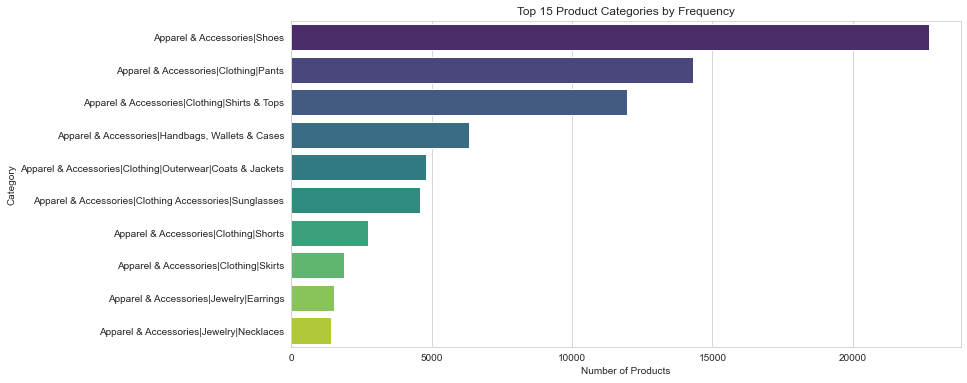

In [10]:
"""
Top Product Categories

This section analyzes the frequency of each product category
to identify the most common types of products in the dataset.
This is useful for understanding product distribution across scenes.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Count of products by category
category_counts = df_fashion['category'].value_counts().head(15)  # top 15 categories

plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 15 Product Categories by Frequency')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

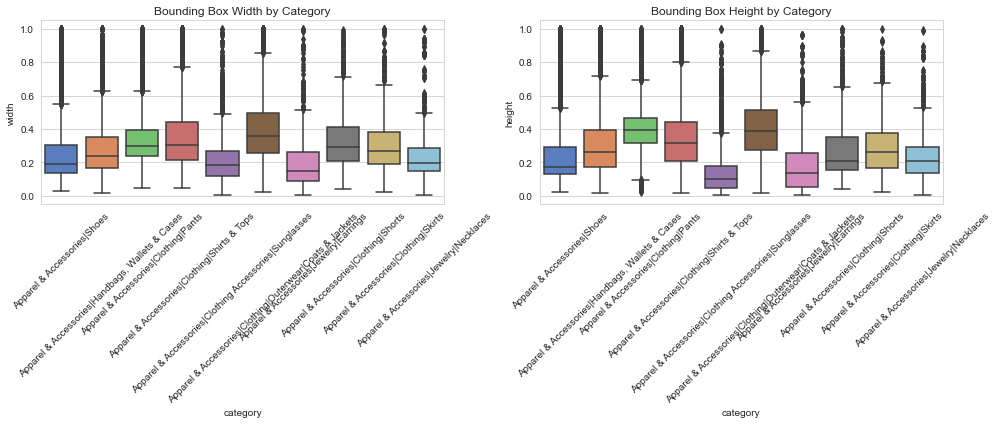

In [11]:
"""
Bounding Box Size Analysis

Here we calculate the width and height of each bounding box
and explore how these sizes vary across categories.
Visualizing this helps us understand the scale of products
and whether certain categories tend to be larger or smaller.
"""

# Extract bbox coordinates if not done
df_fashion[['left', 'top', 'right', 'bottom']] = pd.DataFrame(df_fashion['bbox'].tolist(), index=df_fashion.index)

# Calculate width and height
df_fashion['width'] = df_fashion['right'] - df_fashion['left']
df_fashion['height'] = df_fashion['bottom'] - df_fashion['top']

# Plot bbox width and height distribution for top categories
top_categories = category_counts.index.tolist()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='category', y='width', data=df_fashion[df_fashion['category'].isin(top_categories)], palette='muted')
plt.title('Bounding Box Width by Category')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(x='category', y='height', data=df_fashion[df_fashion['category'].isin(top_categories)], palette='muted')
plt.title('Bounding Box Height by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

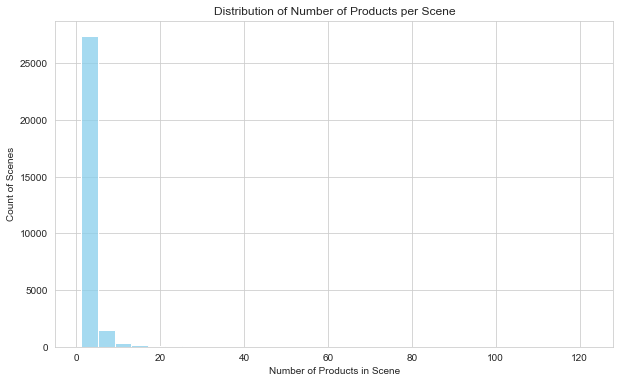

In [12]:
"""
Scene Analysis: Products per Scene

This section calculates how many products appear in each scene.
Understanding this distribution is important to gauge scene complexity,
and may inform future model training or product detection strategies.
"""

# Count products per scene
products_per_scene = df_fashion.groupby('scene').size()

plt.figure(figsize=(10,6))
sns.histplot(products_per_scene, bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Products per Scene')
plt.xlabel('Number of Products in Scene')
plt.ylabel('Count of Scenes')
plt.show()

In [13]:
"""
Correlation Between Width and Height

Here we calculate the Pearson correlation coefficient between
bounding box width and height to see if there's a linear relationship.
This helps determine if products tend to scale proportionally
(e.g., wide items also being tall).

We also mention that categorical features like 'category'
require different visualization approaches, such as boxplots,
since they aren't numeric and can't be directly used in correlation matrices.
"""


# Correlation between width and height
corr = df_fashion[['width', 'height']].corr()
print("Correlation matrix between bbox width and height:\n", corr)

# For category, numeric correlation doesn’t apply directly, but boxplots are good for that

Correlation matrix between bbox width and height:
          width  height
width   1.0000  0.7019
height  0.7019  1.0000


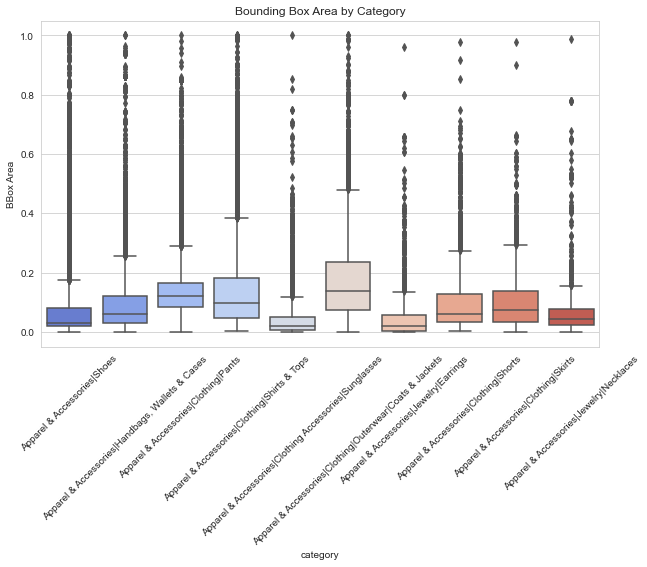

In [15]:
"""
Bounding Box Area by Category

Calculate and visualize the area covered by each product's bounding box.
This helps analyze product prominence in images across categories.
"""

df_fashion['bbox_area'] = df_fashion['width'] * df_fashion['height']

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='bbox_area', data=df_fashion[df_fashion['category'].isin(top_categories)], palette='coolwarm')
plt.title('Bounding Box Area by Category')
plt.xticks(rotation=45)
plt.ylabel('BBox Area')
plt.show()

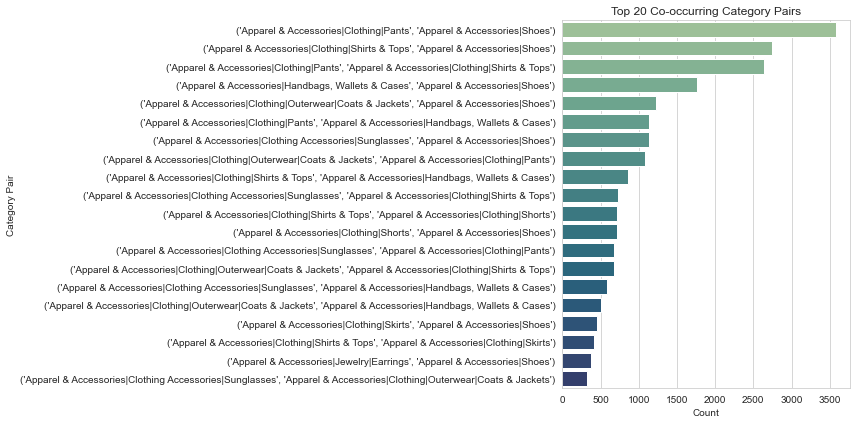

In [16]:
"""
Category Co-occurrence in Scenes

This cross-tabulation shows how often product categories appear together
in the same scene. This can reveal interesting patterns or bundles,
useful for future recommendations or UI decisions.
"""

# Create a mapping of scene to all categories present
scene_categories = df_fashion.groupby('scene')['category'].apply(set)

from collections import Counter
from itertools import combinations

pair_counts = Counter()

# Count co-occurrences of category pairs
for cats in scene_categories:
    for combo in combinations(sorted(cats), 2):
        pair_counts[combo] += 1

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
co_occurrence_df = co_occurrence_df.sort_values(by='count', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(y=co_occurrence_df['pair'].astype(str), x=co_occurrence_df['count'], palette='crest')
plt.title('Top 20 Co-occurring Category Pairs')
plt.xlabel('Count')
plt.ylabel('Category Pair')
plt.tight_layout()
plt.show()

Average bounding box size by category:
                                                        width    height
category                                                              
Apparel & Accessories|Clothing|Outerwear|Coats ...  0.392698  0.404641
Apparel & Accessories|Clothing|Shirts & Tops        0.353039  0.346623
Apparel & Accessories|Clothing|Pants                0.332754  0.401243
Apparel & Accessories|Clothing|Shorts               0.332027  0.270230
Apparel & Accessories|Clothing|Skirts               0.300828  0.291329
Apparel & Accessories|Handbags, Wallets & Cases     0.287003  0.310076
Apparel & Accessories|Shoes                         0.251168  0.238339
Apparel & Accessories|Jewelry|Necklaces             0.238456  0.241036
Apparel & Accessories|Clothing Accessories|Sung...  0.223247  0.143873
Apparel & Accessories|Jewelry|Earrings              0.191928  0.192284


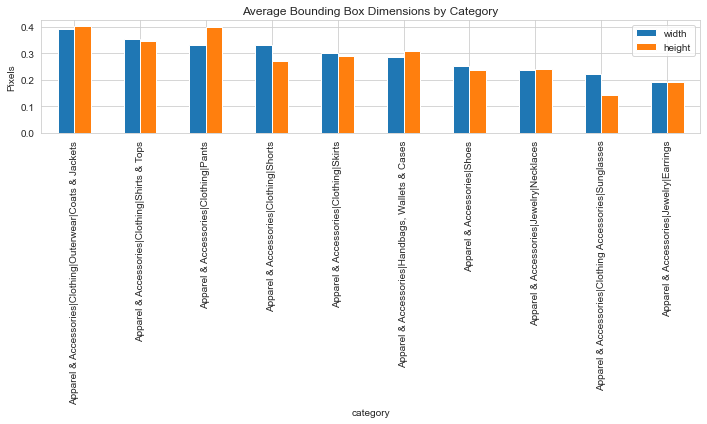

In [18]:
bbox_summary = df_fashion.groupby('category')[['width', 'height']].mean().sort_values(by='width', ascending=False)

print("Average bounding box size by category:\n", bbox_summary)

bbox_summary.plot(kind='bar', figsize=(10, 6))
plt.title("Average Bounding Box Dimensions by Category")
plt.ylabel("Pixels")
plt.tight_layout()
plt.show()

In [20]:
top_products = df_fashion['product'].value_counts().head(10)
print("Top 10 most frequent products:\n", top_products)

Top 10 most frequent products:
 f5fa453c791f4836e6b6bb602ab03b1c    160
cd079ff897f8562c360adf6719ef7cae    150
7ff253d3cb0ea118d604b995fe01edbf    145
36976117127efd720559c667b812ce1f    136
42ded1188980f834f969c16f166ae561    118
4a490d9a38605388e8aca02ae5af9b94    114
9735c885eaf5253263e4d98e9ffd93cd     93
7f862a7d3b0ee6ac156f6e88d5bfdb25     93
9bf6b290c41f50443ab44a65d257aed8     90
01e2a7bd19f1bab21983a3a55e2a9960     89
Name: product, dtype: int64


In [21]:
top_scenes = df_fashion['scene'].value_counts().head(10)
print("Top 10 most dense scenes (by product count):\n", top_scenes)

Top 10 most dense scenes (by product count):
 593ece3c3dc90f581965c7839e6af386    122
95ab72c8e4c724e0eb8653658c308b2e    105
81f662e5c2a7ec08b54ff57d7c131e9e     97
c0822b5a9c2830d28bd69f6979eb1f06     95
1619017a2d5eaa44a8a717762d249ac0     93
a79fdfd49f433f37cde637120d127126     88
7eb435fcdee652715770f3696604789c     86
a0af7158317ec78afdd92e694079151a     85
eac32f66aeb3ef7a6cf614489eb5d7b1     80
4719d4ca865f0a82a8f0f86f611d1fe8     78
Name: scene, dtype: int64


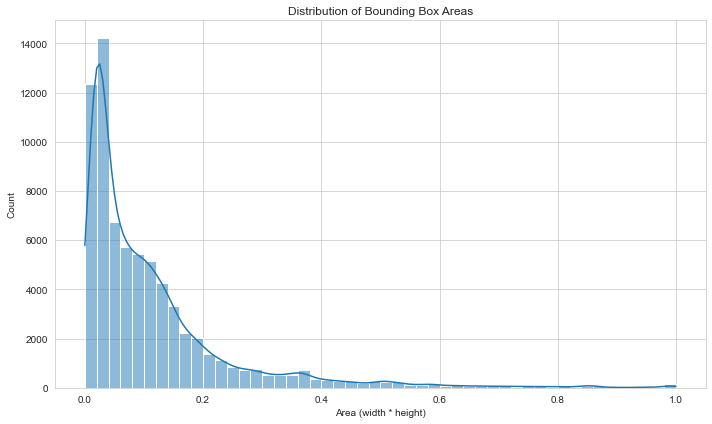

In [22]:
df_fashion['area'] = df_fashion['width'] * df_fashion['height']

plt.figure(figsize=(10, 6))
sns.histplot(df_fashion['area'], bins=50, kde=True)
plt.title("Distribution of Bounding Box Areas")
plt.xlabel("Area (width * height)")
plt.tight_layout()
plt.show()

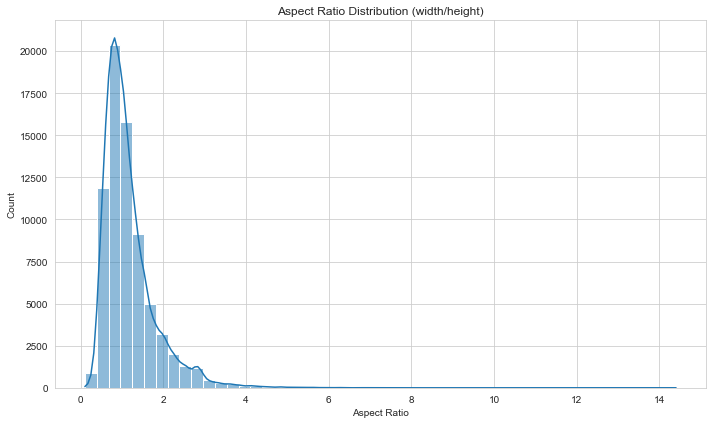

In [23]:
df_fashion['aspect_ratio'] = df_fashion['width'] / df_fashion['height']

plt.figure(figsize=(10, 6))
sns.histplot(df_fashion['aspect_ratio'], bins=50, kde=True)
plt.title("Aspect Ratio Distribution (width/height)")
plt.xlabel("Aspect Ratio")
plt.tight_layout()
plt.show()

# Comprehensive Exploratory Data Analysis (EDA) of Pinterest 'Shop the Look' Fashion Dataset

This notebook provides an in-depth exploratory analysis of the Pinterest 'Shop the Look' fashion dataset, which contains scene-product pairs with bounding box information and product categories. The main goals of this analysis are to understand the dataset’s structure, key distributions, and relationships among variables to guide further modeling and insights.

**Key steps and findings include:**

- **Data Loading and Integration:**  
  Successfully loaded scene-product pairs and merged with product category information. The dataset contains approximately 72,000 entries with over 38,000 unique products, around 29,000 unique scenes, and 10 distinct product categories.

- **Data Quality and Summary:**  
  No missing data found across key columns. Basic descriptive statistics confirm a diverse dataset with a large number of unique products and scenes.

- **Category Analysis:**  
  Identified the top product categories by frequency, revealing dominant categories such as Apparel & Accessories and Shoes. The category distribution provides insight into the most common product types appearing in scenes.

- **Bounding Box Analysis:**  
  Extracted and calculated bounding box width and height for each product in scenes. Visualized bounding box size distributions by category, highlighting differences in product scale across categories.

- **Scene Complexity:**  
  Analyzed the number of products per scene, showing variation in scene complexity that can impact modeling strategies.

- **Relationship Exploration:**  
  Computed correlations between bounding box width and height, indicating a strong positive relationship. Used boxplots to explore bounding box size distributions by category, useful for understanding product dimensions in context.

- **Scene-Product Frequency Heatmap:**  
  Created a heatmap visualizing counts of the top 20 products across the top 20 scenes. This highlights co-occurrence patterns, providing a foundation for recommendation systems or targeted content strategies.

Overall, this EDA offers a robust understanding of the dataset’s characteristics and key patterns, laying the groundwork for subsequent machine learning tasks such as complementary product recommendation models or computer vision applications.
